## **Import Libraries**

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import geopandas as gpd

sns.set_palette("Set2")
sns.set_style("ticks")

## **Import Data**

In [2]:
crimes = pd.read_csv("https://github.com/fescobar96/Crime-Prediction-in-San-Francisco/raw/master/Data/train.zip")

In [3]:
weather = pd.read_csv("https://raw.githubusercontent.com/fescobar96/Crime-Prediction-in-San-Francisco/master/Data/sf_weather.csv")

In [4]:
football = pd.read_csv("https://raw.githubusercontent.com/fescobar96/Crime-Prediction-in-San-Francisco/master/Data/49schedule.csv")

## **Data Preprocessing - San Francisco Crimes**

In [5]:
crimes_missing = pd.DataFrame(crimes.isnull().mean()*100, columns=["Missing Values %"])
crimes_missing

,Missing Values %
Dates,0.0
Category,0.0
Descript,0.0
DayOfWeek,0.0
PdDistrict,0.0
Resolution,0.0
Address,0.0
X,0.0
Y,0.0


In [6]:
crimes_original = crimes.copy()
crimes_original["Dates"] = pd.to_datetime(crimes["Dates"])
crimes_original.set_index(keys=crimes_original["Dates"], inplace=True)
crimes_original.drop(columns=["Dates"], inplace=True)
crimes_original

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
Dates,,,,,,,,
2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...
2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266


In [6]:
crimes.drop(columns=["Category", "Descript", "Resolution", "Address", "X", "Y"], inplace=True)

In [7]:
crimes["Dates"] = pd.to_datetime(crimes["Dates"]).dt.date

In [8]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Dates       878049 non-null  object
 1   DayOfWeek   878049 non-null  object
 2   PdDistrict  878049 non-null  object
dtypes: object(3)
memory usage: 20.1+ MB


In [9]:
crimes.head()

,Dates,DayOfWeek,PdDistrict
0,2015-05-13,Wednesday,NORTHERN
1,2015-05-13,Wednesday,NORTHERN
2,2015-05-13,Wednesday,NORTHERN
3,2015-05-13,Wednesday,NORTHERN
4,2015-05-13,Wednesday,PARK


## **Data Preprocessing - Weather**

In [10]:
weather_missing = pd.DataFrame(weather.isnull().mean()*100, columns=["Missing Values %"])
weather_missing

,Missing Values %
date,0.0
avg_temp (celsius),0.0
precipitation (mm),0.0
wind_speed (km/h),0.0
visibility (km),0.0
"moon_illumination, %",0.0


In [11]:
weather["Dates"] = pd.to_datetime(weather["date"]).dt.date
weather

,date,avg_temp (celsius),precipitation (mm),wind_speed (km/h),visibility (km),"moon_illumination, %",Dates
0,2003-01-01,9,0.00,3,15.0,"Waning Crescent, 1",2003-01-01
1,2003-01-02,10,0.00,5,15.0,"Waning Crescent, 0",2003-01-02
2,2003-01-03,10,0.00,5,15.0,"New Moon, 1",2003-01-03
3,2003-01-04,11,0.00,5,15.0,"Waxing Crescent, 5",2003-01-04
4,2003-01-05,11,0.25,5,6.0,"Waxing Crescent, 10",2003-01-05
...,...,...,...,...,...,...,...
4511,2015-05-09,15,0.00,19,45.0,16,2015-05-09
4512,2015-05-10,14,0.00,21,47.0,16,2015-05-10
4513,2015-05-11,14,0.00,36,66.0,16,2015-05-11
4514,2015-05-12,14,0.00,38,69.0,16,2015-05-12


In [12]:
weather_original = weather.copy()
weather_original["Dates"] = pd.to_datetime(weather["Dates"])
weather_original.set_index(keys=weather_original["Dates"], inplace=True)
weather_original.drop(columns=["Dates"], inplace=True)

In [13]:
weather.drop(columns=["date", "moon_illumination, %"], inplace=True)

In [14]:
weather.head()

,avg_temp (celsius),precipitation (mm),wind_speed (km/h),visibility (km),Dates
0,9,0.00,3,15.0,2003-01-01
1,10,0.00,5,15.0,2003-01-02
2,10,0.00,5,15.0,2003-01-03
3,11,0.00,5,15.0,2003-01-04
4,11,0.25,5,6.0,2003-01-05


## **Data Preprocessing - Football Schedule**

In [15]:
football_missing = pd.DataFrame(football.isnull().mean()*100, columns=["Missing Values %"])
football_missing

,Missing Values %
Date,0.0
Output,0.0
Home,0.0


In [16]:
football["Dates"] = pd.to_datetime(football["Date"])
football.drop(columns=["Date"], inplace=True)
football.rename(columns={"Output":"NFL_Output",
                 "Home":"NFL_Home"}, inplace=True)
football["NFL_Game_Day"] = 1

In [17]:
football.head()

,NFL_Output,NFL_Home,Dates,NFL_Game_Day
0,W,1.0,2003-09-07,1
1,L,0.0,2003-09-14,1
2,L,1.0,2003-09-21,1
3,L,0.0,2003-09-28,1
4,W,1.0,2003-10-05,1


## **Merge crimes, weather, and football schedule dataframes**

In [18]:
data=pd.merge(crimes, weather, how="left", on="Dates")
data["Dates"] = pd.to_datetime(data["Dates"])
data=pd.merge(data, football, how="left", on="Dates") #Added this line
data["Dates"] = pd.to_datetime(data["Dates"])
data.set_index(keys=data["Dates"], inplace=True)
data.drop(columns=["Dates"], inplace=True)

In [19]:
data.rename(columns={"avg_temp (celsius)":"avg_temp",
             "precipitation (mm)":"precipitation",
             "wind_speed (km/h)":"wind_speed",
             "visibility (km)":"visibility"
             }, inplace=True)

In [20]:
data["precipitation"].replace({"T":np.nan}, inplace=True)
data["precipitation"] = data["precipitation"].astype("float")

In [21]:
data["wind_speed"].replace({"Waning Crescent, 14":np.nan}, inplace=True)
data["wind_speed"] = data["wind_speed"].astype("float")

In [22]:
data["NFL_Output"].fillna("No Game", inplace=True)
data["NFL_Home"].fillna(3, inplace=True) #3 Indicates no game for that day
data["NFL_Game_Day"].fillna(0, inplace=True)

In [23]:
data["NFL_Home"].replace({"0": 0,
                          "1":1,
                          "0.0":0,
                          "1.0":1}, inplace=True)

In [24]:
data["NFL_Game_Day"] = data["NFL_Game_Day"].astype("int")

In [28]:
data.head(20)
#trabajar un modelo general para predecir el crimen en funcion de la tempereratura promedio, 
#si hay partido de la NFL, que dia es, que mes y los lags del 4 al 1

,DayOfWeek,PdDistrict,avg_temp,precipitation,wind_speed,visibility,NFL_Output,NFL_Home,NFL_Game_Day
Dates,,,,,,,,,
2015-05-13,Wednesday,NORTHERN,15,0.0,19.0,40.0,No Game,3,0
2015-05-13,Wednesday,NORTHERN,15,0.0,19.0,40.0,No Game,3,0
2015-05-13,Wednesday,NORTHERN,15,0.0,19.0,40.0,No Game,3,0
2015-05-13,Wednesday,NORTHERN,15,0.0,19.0,40.0,No Game,3,0
2015-05-13,Wednesday,PARK,15,0.0,19.0,40.0,No Game,3,0
2015-05-13,Wednesday,INGLESIDE,15,0.0,19.0,40.0,No Game,3,0
2015-05-13,Wednesday,INGLESIDE,15,0.0,19.0,40.0,No Game,3,0
2015-05-13,Wednesday,BAYVIEW,15,0.0,19.0,40.0,No Game,3,0
2015-05-13,Wednesday,RICHMOND,15,0.0,19.0,40.0,No Game,3,0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 878049 entries, 2015-05-13 to 2003-01-06
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   DayOfWeek      878049 non-null  object 
 1   PdDistrict     878049 non-null  object 
 2   avg_temp       878049 non-null  int64  
 3   precipitation  830591 non-null  float64
 4   wind_speed     877621 non-null  float64
 5   visibility     878049 non-null  float64
 6   NFL_Output     878049 non-null  object 
 7   NFL_Home       878049 non-null  int64  
 8   NFL_Game_Day   878049 non-null  int32  
dtypes: float64(3), int32(1), int64(2), object(3)
memory usage: 63.6+ MB


## **Crimes by Year**

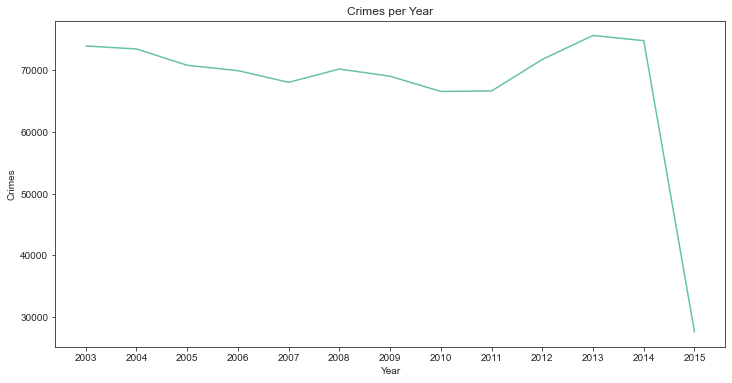

In [28]:
plt.figure(figsize=(12,6))
yearly_crimes = data["DayOfWeek"].resample("Y").count()
years = [x for x in range(2003, 2016)]
sns.lineplot(x=years, y=yearly_crimes.values)
plt.xlabel("Year")
plt.ylabel("Crimes")
plt.xticks(years, years)
plt.title("Crimes per Year")
plt.show()

## **Crimes by Day of the Week**

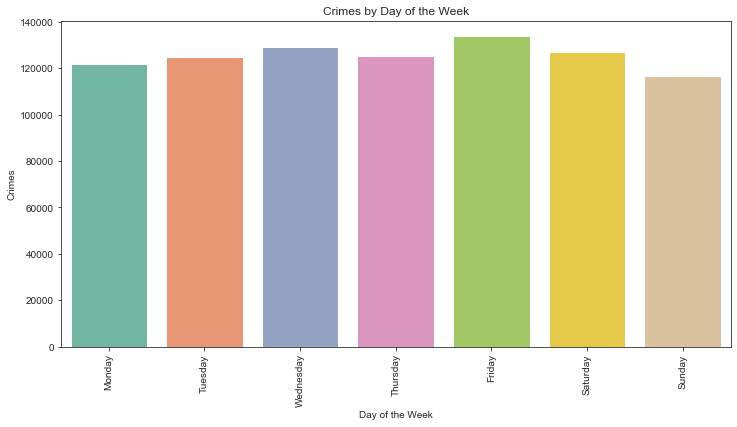

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(x="DayOfWeek", data=data, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Crimes by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Crimes")
plt.xticks(rotation=90)
plt.show()

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 878049 entries, 2015-05-13 to 2003-01-06
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   DayOfWeek      878049 non-null  object 
 1   PdDistrict     878049 non-null  object 
 2   avg_temp       878049 non-null  int64  
 3   precipitation  830591 non-null  float64
 4   wind_speed     877621 non-null  float64
 5   visibility     878049 non-null  float64
 6   NFL_Output     878049 non-null  object 
 7   NFL_Home       878049 non-null  int64  
 8   NFL_Game_Day   878049 non-null  int32  
dtypes: float64(3), int32(1), int64(2), object(3)
memory usage: 63.6+ MB


## **Crimes per Hour**

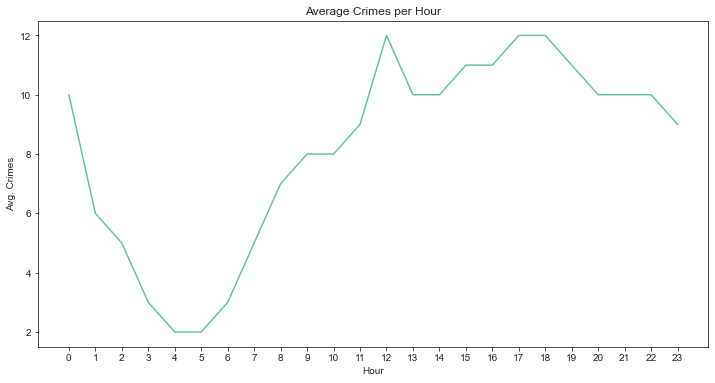

In [31]:
plt.figure(figsize=(12,6))
hourly_crimes = crimes_original["DayOfWeek"].resample("H").count()
hours = [x for x in range(0, 24)]
hourly_crimes = round(hourly_crimes.groupby(hourly_crimes.index.hour).mean(), 0)
hourly_crimes.values
sns.lineplot(x=hours, y=hourly_crimes.values)
plt.xlabel("Hour")
plt.ylabel("Avg. Crimes")
plt.title("Average Crimes per Hour")
plt.xticks(hours, hours)
plt.show()

## **Crimes by Category**

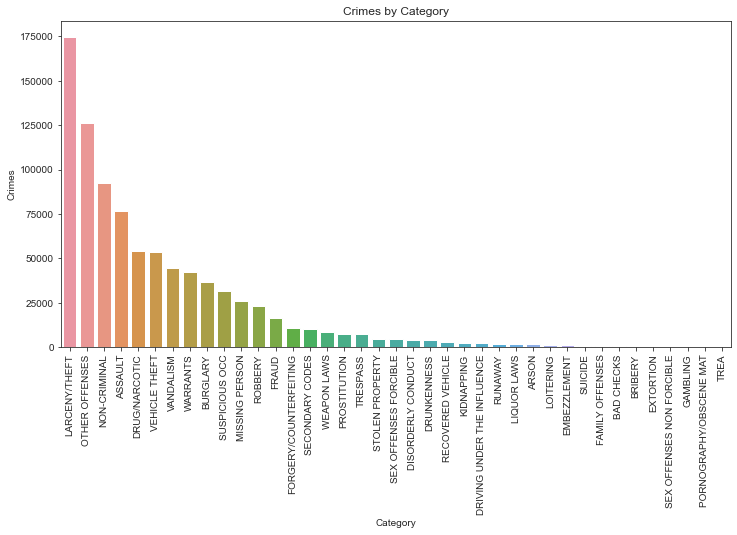

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(x="Category", data=crimes_original, order=crimes_original["Category"].value_counts().index)
plt.title("Crimes by Category")
plt.ylabel("Crimes")
plt.xticks(rotation=90)
plt.show()

## **Crimes by Police Department District**

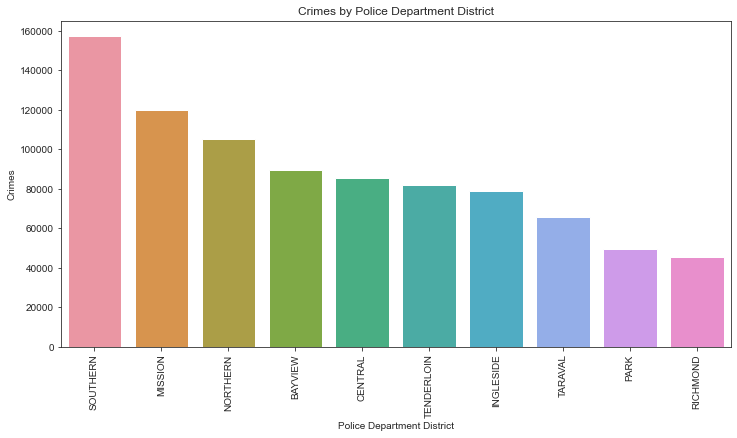

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(x="PdDistrict", data=crimes_original, order=crimes_original["PdDistrict"].value_counts().index)
plt.xlabel("Police Department District")
plt.ylabel("Crimes")
plt.title("Crimes by Police Department District")
plt.xticks(rotation=90)
plt.show()

## **Crimes by Resolutions**

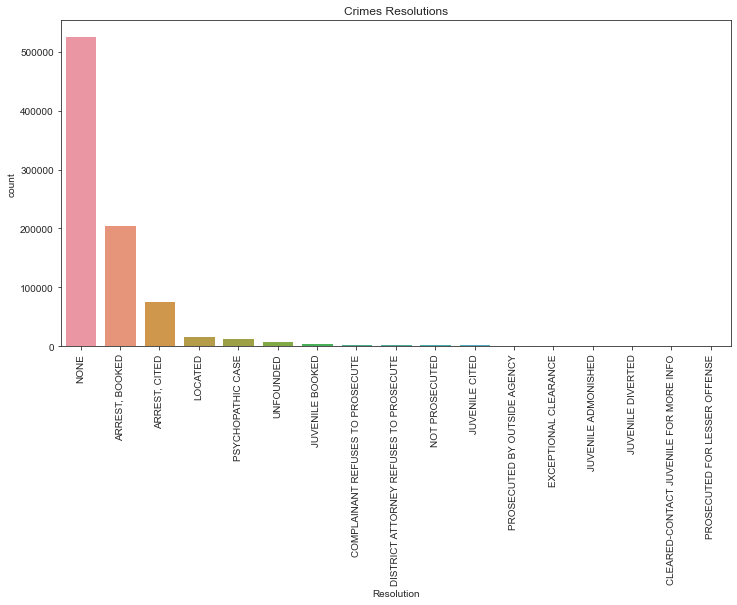

In [34]:
plt.figure(figsize=(12,6))
sns.countplot(x="Resolution", data=crimes_original, order=crimes_original["Resolution"].value_counts().index)
plt.title("Crimes Resolutions")
plt.xticks(rotation=90)
plt.show()

## **Correlation Matrix**

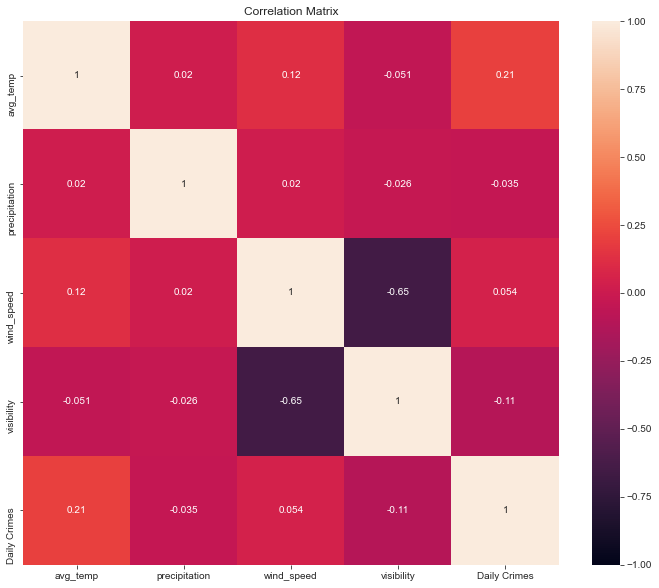

In [35]:
plt.figure(figsize=(12,10))
crimes_weather = data.resample("D").agg({"avg_temp":"mean", "precipitation":"mean", "wind_speed":"mean", "visibility":"mean", "PdDistrict":"count"}).dropna()
crimes_weather.rename(columns={"PdDistrict":"Daily Crimes"}, inplace=True)
sns.heatmap(crimes_weather.corr(), annot=True, vmin=-1, vmax=1, )
plt.title("Correlation Matrix")
plt.show()